In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn


In [165]:
data = pd.read_csv("AAPL.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-07-25,0.898438,0.904018,0.876116,0.893973,0.755812,211607200
1,2000-07-26,0.890067,0.915179,0.879464,0.893973,0.755812,210470400
2,2000-07-27,0.892857,0.950893,0.890625,0.928571,0.785063,294985600
3,2000-07-28,0.933594,0.937500,0.837054,0.862723,0.729392,237893600
4,2000-07-31,0.877790,0.921875,0.870536,0.907366,0.767135,155299200
...,...,...,...,...,...,...,...
6036,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600
6037,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.490005,51391200
6038,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.960007,41601300
6039,2024-07-29,216.960007,219.300003,215.750000,218.240005,218.240005,36311800


In [167]:
data = data[['Date', "Close"]]
data

,Date,Close
0,2000-07-25,0.893973
1,2000-07-26,0.893973
2,2000-07-27,0.928571
3,2000-07-28,0.862723
4,2000-07-31,0.907366
...,...,...
6036,2024-07-24,218.539993
6037,2024-07-25,217.490005
6038,2024-07-26,217.960007
6039,2024-07-29,218.240005


In [169]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [171]:
data["Date"] = pd.to_datetime(data["Date"])

/var/folders/vm/s6yr79_d1t75v3n3_30shbc00000gn/T/ipykernel_64728/2487158108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"])


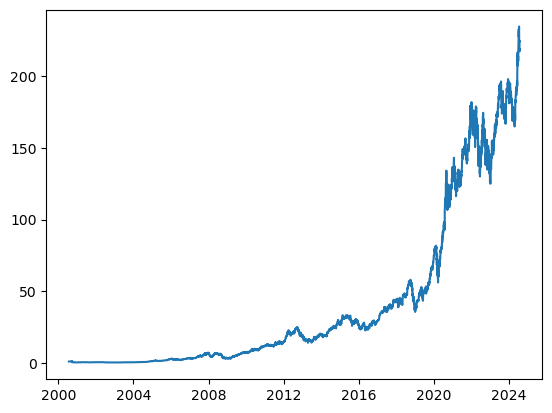

In [173]:
plt.plot(data["Date"], data["Close"])

In [175]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    df.set_index("Date", inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df["Close"].shift(i)

    df.dropna(inplace=True)

    return df

df = prepare_dataframe_for_lstm(data, 7)

In [177]:
df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
2000-08-03,0.857143,0.843750,0.880580,0.907366,0.862723,0.928571,0.893973,0.893973
2000-08-04,0.845982,0.857143,0.843750,0.880580,0.907366,0.862723,0.928571,0.893973
2000-08-07,0.856027,0.845982,0.857143,0.843750,0.880580,0.907366,0.862723,0.928571
2000-08-08,0.834821,0.856027,0.845982,0.857143,0.843750,0.880580,0.907366,0.862723
2000-08-09,0.848214,0.834821,0.856027,0.845982,0.857143,0.843750,0.880580,0.907366
...,...,...,...,...,...,...,...,...
2024-07-24,218.539993,225.009995,223.960007,224.309998,224.179993,228.880005,234.820007,234.399994
2024-07-25,217.490005,218.539993,225.009995,223.960007,224.309998,224.179993,228.880005,234.820007
2024-07-26,217.960007,217.490005,218.539993,225.009995,223.960007,224.309998,224.179993,228.880005


In [179]:
df = df.to_numpy() #convert to numpy, changes data to a tensor

In [181]:
df.shape

(6034, 8)

In [183]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
df_np = scaler.fit_transform(df)

df_np
#normalizes values from range -1 to 1 

array([[-0.99468973, -0.99480391, -0.99448991, ..., -0.99408076,
        -0.99437573, -0.99437573],
       [-0.99478488, -0.99468973, -0.99480391, ..., -0.99464215,
        -0.99408076, -0.99437573],
       [-0.99469924, -0.99478488, -0.99468973, ..., -0.99426154,
        -0.99464215, -0.99408076],
       ...,
       [ 0.85625724,  0.85225015,  0.861202  , ...,  0.91039515,
         0.90928677,  0.94935751],
       [ 0.85864441,  0.85625724,  0.85225015, ...,  0.90741124,
         0.91039515,  0.90928677],
       [ 0.86341876,  0.85864441,  0.85625724, ...,  0.91636309,
         0.90741124,  0.91039515]])

In [185]:
X = df_np[:, 1:]
y = df_np[:, 0]
X.shape, y.shape

((6034, 7), (6034,))

In [187]:
X= dc(np.flip(X, axis=1))

In [189]:
split = int(len(X)*0.95)

split

5732

In [191]:
X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]


In [193]:

X_train = X_train.reshape((-1,7, 1))
X_test = X_test.reshape((-1,7, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5732, 7, 1), (302, 7, 1), (5732, 1), (302, 1))

In [195]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([5732, 7, 1]),
 torch.Size([302, 7, 1]),
 torch.Size([5732, 1]),
 torch.Size([302, 1]))

In [197]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)
    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [199]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [201]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        #lstm gate vectors
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [203]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [205]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [207]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.782
Batch 200, Loss: 0.131
Batch 300, Loss: 0.033

Val Loss: 0.138
***************************************************

Epoch: 2
Batch 100, Loss: 0.004
Batch 200, Loss: 0.003
Batch 300, Loss: 0.003

Val Loss: 0.080
***************************************************

Epoch: 3
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002
Batch 300, Loss: 0.002

Val Loss: 0.066
***************************************************

Epoch: 4
Batch 100, Loss: 0.002
Batch 200, Loss: 0.001
Batch 300, Loss: 0.001

Val Loss: 0.052
***************************************************

Epoch: 5
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001
Batch 300, Loss: 0.001

Val Loss: 0.045
***************************************************

Epoch: 6
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001
Batch 300, Loss: 0.001

Val Loss: 0.038
***************************************************

Epoch: 7
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001
Batch 300, Loss: 0.001

Val Loss: 0.032
*****************

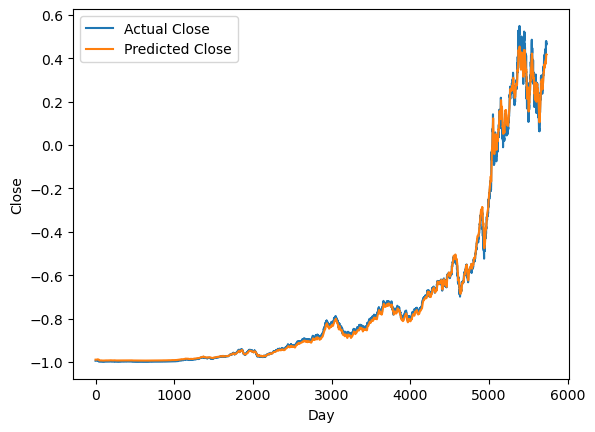

In [208]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()